In [97]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import os
import pdb

In [98]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [99]:
#%matplotlib notebook
%matplotlib inline

font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(15, 8)

## MNIST

To specify a weight hyperparameter value (eg. lambda=1.0) for cycle-consistency regularizer, runs like

```
python alice_mnist.py --lambda 1.0
```

In [104]:
dat_MNIST_ALICE_ICP = array([
    [0, 8.749, 0.09],
    [0.00001, 8.851, 0.08],
    [0.0001, 8.869, 0.10],
    [0.001, 8.901, 0.09],
    [0.01, 9.1045, 0.07],
    [0.1, 9.2618, 0.04],
    [1, 9.279, 0.07],
    [10, 8.918, 0.11],
    [100, 8.533, 0.09],
    [1000, 7.776, 0.10],
    [10000, 1.334, 0.01],
    [100000, 1.662, 0.006],
])

dat_MNIST_ALICE_MSE = array([
    [0, 0.4803, 0.100],
    [0.00001, 0.5012, 0.039],
    [0.0001, 0.5272, 0.037],
    [0.001, 0.4567, 0.024],
    [0.01, 0.1721, 0.012],
    [0.1, 0.0982, 0.008],
    [1, 0.0803, 0.007],
    [10, 0.0856, 0.006],
    [100, 0.2228, 0.014],
    [1000, 0.2389, 0.026],
    [10000, 0.1107, 0.005],
    [100000, 0.1375, 0.009],
])

In [105]:
# Style
figsize(10, 5)
plt.rc('text', usetex=True)

# Create directory to save figs
fig_dir = 'figures/'
directory = fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)

In [124]:
def plot_hyperpara_ff(dat, logx=False, ylabel_name=None, c=(.7,.7,1), saveas=None, IsMax=None):
    plotfn = semilogx if logx else plot
    
    x, y, yerr = dat[:,0], dat[:,1], dat[:,2]
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr 
    plotfn(x, y,'o-', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    fill_between(x, ymax, ymin, alpha=0.2, color=(.7,.7,1)) 
    if IsMax=='max':
        idx = np.argmax(y, axis=0)
    elif IsMax=='min':
        idx = np.argmin(y, axis=0)
    plotfn(x[idx], y[idx], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    axhline(y[0], color=(.7,.7,.7), ls='--', label='w/o CE regularizer')
    
    legend(loc=3)
    xlabel('Weighting hyperparameter')
    if ylabel_name:
        ylabel(ylabel_name)
    plt.tight_layout()    

    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

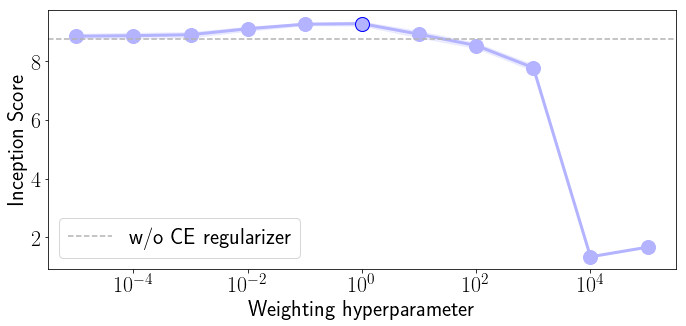

In [125]:
plot_hyperpara_ff(dat_MNIST_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'mnist_icp_weighting', IsMax='max')

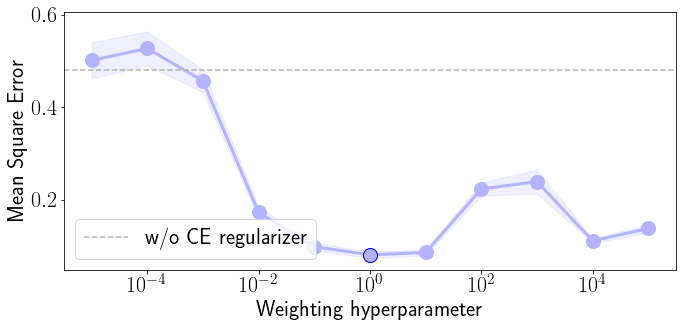

In [126]:
plot_hyperpara_ff(dat_MNIST_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'mnist_mse_weighting', IsMax='min')

## CIFAR

In [127]:
dat_CIFAR_ALICE_ICP = array([
    [0, 5.93, 0.0437],
    [1.00E-06, 6.015, 0.0284],
    [1.00E-04, 5.994, 0.0305],
    [1.00E-02, 5.83, 0.0221],
    [1.00E-01, 4.42, 0.0247],
    [5.00E-01, 3.02, 0.0222],
    [1.00E+00, 2.18, 0.0204],
    [1.00E+01, 1.942, 0.0156],
    [5.00E+01, 1.32, 0.0122],
    [1.00E+02, 1.22, .0172],
    [1.00E+03, 1.08, 0.0211]
])

dat_CIFAR_ALICE_MSE = array([
    [0, 0.672, 0.1129],
    [1.00E-06, 0.4155, 0.2015],
    [1.00E-04, 0.2902, 0.1071],
    [1.00E-02, 0.1553, 0.0566],
    [1.00E-01, 0.0991, 0.0349],
    [5.00E-01, 0.0786, 0.0198],
    [1.00E+00, 0.0561, 0.0281],
    [1.00E+01, 0.0321, 0.00198],
    [5.00E+01, 0.0323, 0.003108],
    [1.00E+02, 0.0295, 0.00221],
    [1.00E+03, 0.0217, 0.00176]
])

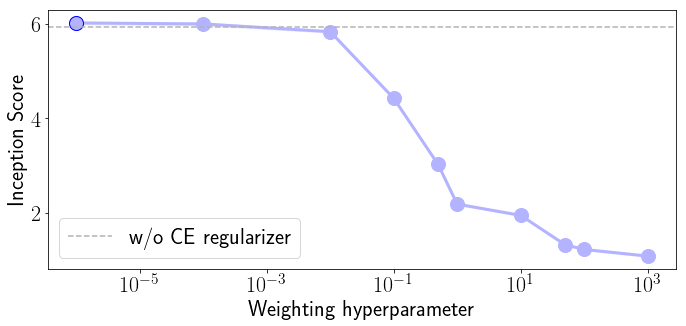

In [128]:
plot_hyperpara_ff(dat_CIFAR_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'cifar_icp_weighting', IsMax='max')

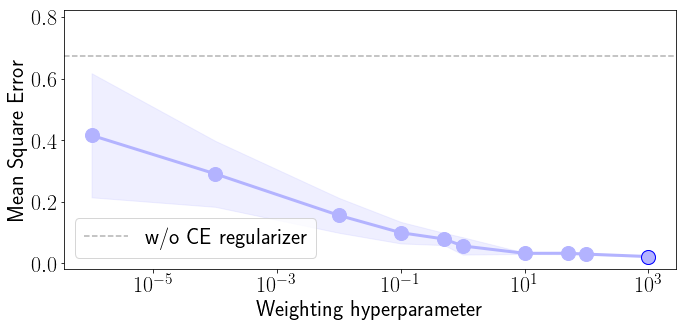

In [129]:
plot_hyperpara_ff(dat_CIFAR_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'cifar_mse_weighting', IsMax='min')